# Multi-Linear Linear Regression Project

## Modeling the linear relationship between Sales and Advertising dataset

### Project Outline

In this assignment, I constructed a Simple Linear Regression model to investigate the linear relationship between the Sales and Advertising datasets for a diet weight control product.

### Linear Regression

Linear regression is a statistical method used to model the relationship between a dependent variable (often denoted as "y") and one or more independent variables (often denoted as "x"). The goal of linear regression is to find the best linear relationship between the independent and dependent variables, where the relationship can be described by a straight line. The straight line is represented by an equation of the form:

y = mx + b

where "m" is the slope of the line and "b" is the y-intercept. The slope "m" represents the change in y for each unit change in x, and the y-intercept "b" represents the value of y when x is zero.

Linear regression is used in various fields, including finance, economics, engineering, and social sciences, to study the relationship between variables and to make predictions. It is a simple yet powerful method that can provide valuable insights into the data and help in making informed decisions. There are different types of linear regression, including Simple Linear Regression and Multiple Linear Regression, which involve one independent variable and more than one independent variable, respectively.

## Importing the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## Load the dataset

In [2]:
df = pd.read_csv('Advertising Budget and Sales.csv')
df

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## Exploratory data analysis:

In [3]:
del df['Unnamed: 0']
df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 4)

In [5]:
df.dtypes

TV Ad Budget ($)           float64
Radio Ad Budget ($)        float64
Newspaper Ad Budget ($)    float64
Sales ($)                  float64
dtype: object

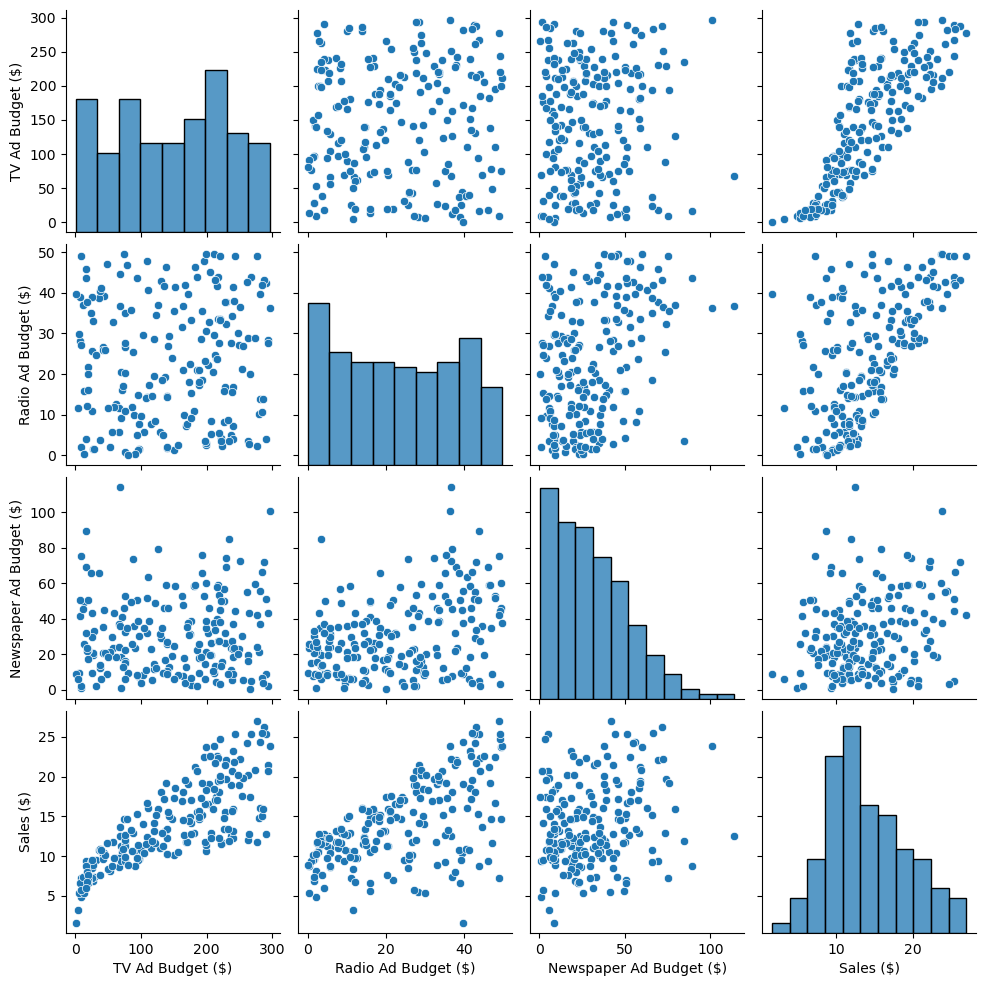

In [6]:
sns.pairplot(df)

<Axes: >

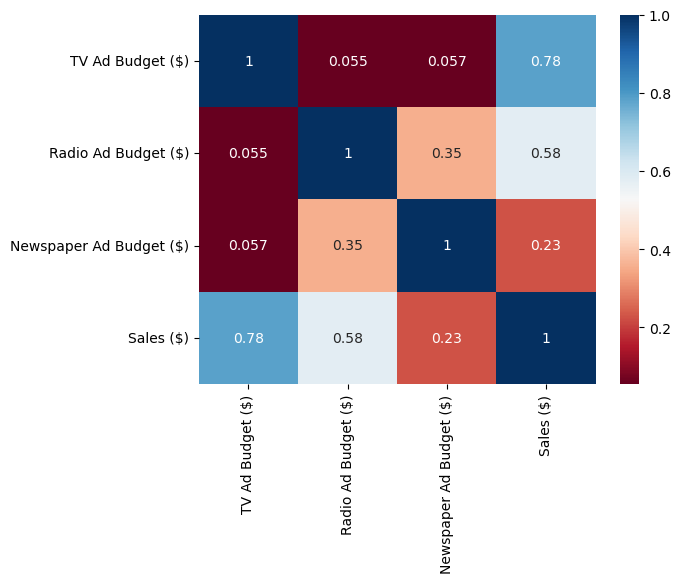

In [7]:
sns.heatmap(df.corr(), cmap='RdBu', annot=True)

(0.0, 28.27)

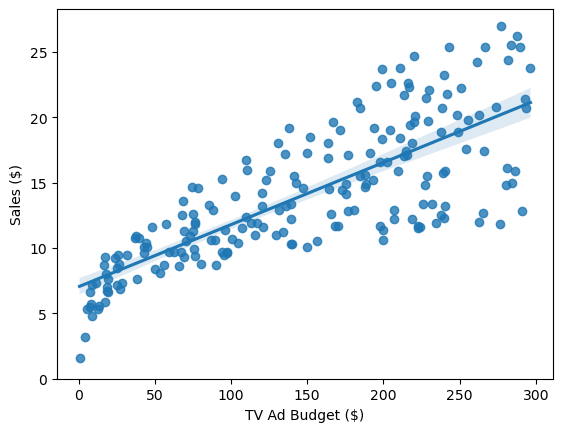

In [8]:
sns.regplot(x='TV Ad Budget ($)',y='Sales ($)',data =df)
plt.ylim(0)

(0.0, 28.27)

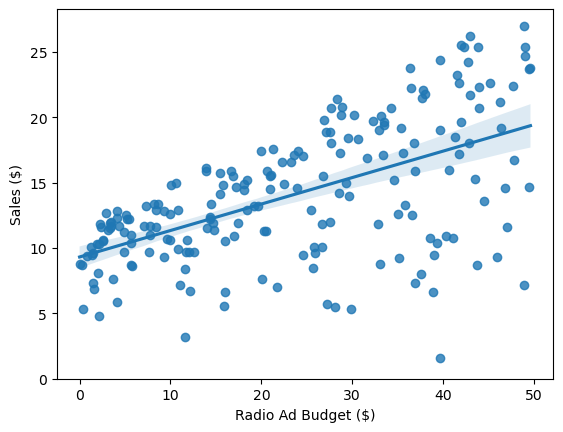

In [9]:
sns.regplot(x='Radio Ad Budget ($)',y='Sales ($)',data =df)
plt.ylim(0)

(0.0, 28.27)

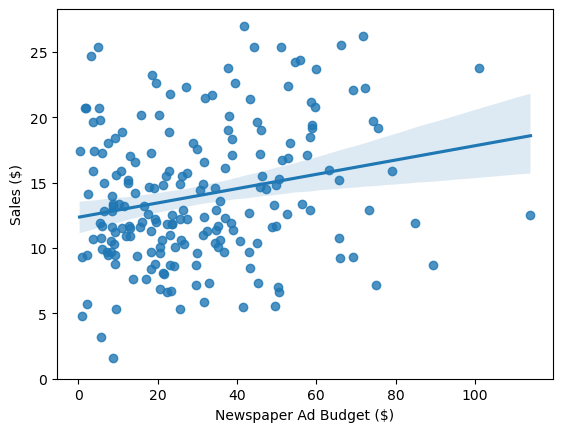

In [10]:
sns.regplot(x='Newspaper Ad Budget ($)',y='Sales ($)',data =df)
plt.ylim(0)

1) We will use simple linear regression to find the best fitting line for TV Ad Budget 
2) We will build a multi linear regression model and check its accuracy and improve

In [11]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df[['TV Ad Budget ($)']]
y = df['Sales ($)']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [14]:
print(X_train.shape)
print(y_train.shape)

(140, 1)
(140,)


In [15]:
lm.fit(X_train,y_train)
yhat = lm.predict(X_test)

In [16]:
a = lm.coef_
b = lm.intercept_,
print("Estimated model slope, a:" , a)
print("Estimated model intercept, b:" , b)

Estimated model slope, a: [0.04581434]
Estimated model intercept, b: (7.310810165411681,)


## To check accuracy

In [17]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, yhat)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))
# very good fit since its very small

RMSE value: 2.7382


In [18]:
from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, yhat)))
#the model is a good fit since the R2 score value is >=0.7

R2 Score value: 0.7256


In [19]:
##Residual analysis

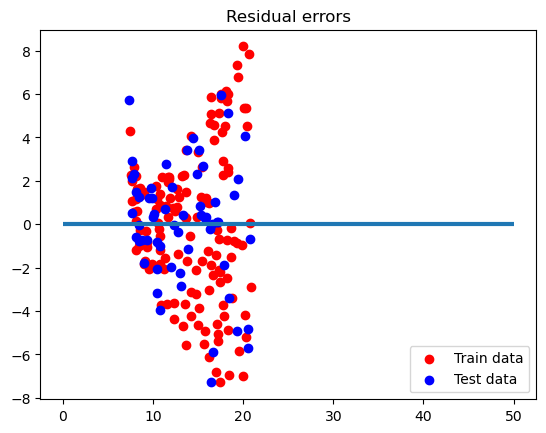

In [20]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show()

In [21]:

# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(lm.score(X_train,y_train)))

print("Test set score: {:.4f}".format(lm.score(X_test,y_test)))

#not a significant difference but can be considered as Underfitting

Training set score: 0.5552
Test set score: 0.7256


# Multiple linear regression

In [22]:
#To improve accuracy build a multi-linear progression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = df[['TV Ad Budget ($)','Radio Ad Budget ($)','Newspaper Ad Budget ($)']]
y = df['Sales ($)']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [23]:
model.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)

In [25]:
# Cross validation to evaluate the model
# Perform k-fold cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV score: %.2f" % scores.mean())
print("Standard deviation of CV scores: %.2f" % scores.std())

Mean CV score: 0.89
Standard deviation of CV scores: 0.04


A high mean CV score of 0.89 and a low standard deviation of CV scores ,0.04, 
indicates that the model is performing well and consistently across different folds. 

In [26]:
#Evaluating the model using metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R-squared: ", r2)


Mean Squared Error:  3.6913948456986065
R-squared:  0.8649018906637792


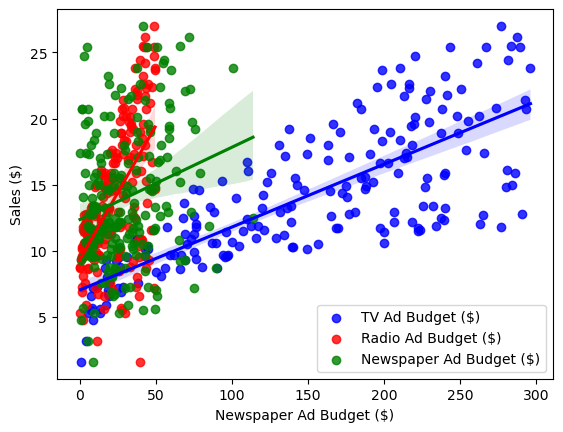

In [27]:
#Model evaluation using visualization
sns.regplot(x=X['TV Ad Budget ($)'], y=y, color='blue', label='TV Ad Budget ($)')
sns.regplot(x=X['Radio Ad Budget ($)'], y=y, color='red', label='Radio Ad Budget ($)')
sns.regplot(x=X['Newspaper Ad Budget ($)'], y=y, color='green', label='Newspaper Ad Budget ($)')
plt.legend()
plt.show()


In [28]:
# Lets try to make a more accurate model

In [29]:
# By Data Normalization using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)
X_Scaled = scaler.transform(X)



In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = X_Scaled
y = df['Sales ($)']
X_train,X_test,y_train,y_test = train_test_split(X_Scaled,y,test_size=0.3,random_state=0)

In [31]:
model.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)

In [33]:
#Evaluating the model using metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

Mean Squared Error:  3.6913948456986083
R-squared:  0.8649018906637792


In [34]:
#To make it more better

In [35]:
# By Outlier Detection and Removal

#sns.boxplot(x='TV Ad Budget ($)',y='Sales ($)',data=df)g*



In [36]:
# Random Forest